In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('../../datasets/train.csv', encoding="latin-1").drop(columns=['Other_Race', 'Hispanic', 'Other_Diagnosis', 
    'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'Alcohol', 'Drug', 'Product_1', 'Product_2', 'Product_3']).dropna()

,Unnamed: 0,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Body_Part,Diagnosis,Disposition,Location,Fire_Involvement,Narrative,Stratum,PSU,Weight
0,900763,180608221.0,5/29/2018,25,1,2.0,35.0,71.0,1.0,9.0,0.0,25YOM PAIN TO KNEE WHEN LIFTING WEIGHTS ...,L,42.0,55.4188
1,762342,180109488.0,1/1/2018,70,2,1.0,30.0,55.0,1.0,1.0,0.0,70 YOF PT STATES SHE FELL IN HER KITCHEN & HIT...,M,16.0,78.3782
2,560150,170718633.0,7/5/2017,18,1,0.0,92.0,59.0,1.0,9.0,0.0,18 YO M LAC FINGER-4-WHEELER ACCIDENT,V,17.0,16.1828
3,464771,170429466.0,4/1/2017,17,2,1.0,34.0,53.0,1.0,0.0,0.0,17 YOF A SHELF FELL ONTO PT WRIST CAUSING A CO...,C,32.0,4.7570
4,866180,180504499.0,4/27/2018,27,1,2.0,35.0,64.0,1.0,0.0,0.0,27 YOM HAS KNEE PX WHICH WORSENS WHILE PLAYING...,V,93.0,16.5919


In [27]:
diagnosis = LabelEncoder()
df["diagnosis_n"] = diagnosis.fit_transform(df["Diagnosis"])
df.head()

,Unnamed: 0,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Body_Part,Diagnosis,Disposition,Location,Fire_Involvement,Narrative,Stratum,PSU,Weight,diagnosis_n
0,900763,180608221.0,5/29/2018,25,1,2.0,35.0,71.0,1.0,9.0,0.0,25YOM PAIN TO KNEE WHEN LIFTING WEIGHTS ...,L,42.0,55.4188,26
1,762342,180109488.0,1/1/2018,70,2,1.0,30.0,55.0,1.0,1.0,0.0,70 YOF PT STATES SHE FELL IN HER KITCHEN & HIT...,M,16.0,78.3782,11
2,560150,170718633.0,7/5/2017,18,1,0.0,92.0,59.0,1.0,9.0,0.0,18 YO M LAC FINGER-4-WHEELER ACCIDENT,V,17.0,16.1828,15
3,464771,170429466.0,4/1/2017,17,2,1.0,34.0,53.0,1.0,0.0,0.0,17 YOF A SHELF FELL ONTO PT WRIST CAUSING A CO...,C,32.0,4.7570,9
4,866180,180504499.0,4/27/2018,27,1,2.0,35.0,64.0,1.0,0.0,0.0,27 YOM HAS KNEE PX WHICH WORSENS WHILE PLAYING...,V,93.0,16.5919,20


In [28]:
X = df["diagnosis_n"]
X.shape

(702542,)

In [29]:
Y = df["Fire_Involvement"]
Y.shape

(702542,)

In [37]:
data = {}
data['fire involvement'] = Y
data['diagnosis'] = X

my_data = pd.DataFrame(data, columns=['fire involvement', 'diagnosis'])
kmeans = KMeans(n_clusters=4).fit(my_data)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.19359864e-02 8.28239626e+00]
 [1.01982295e-02 1.91308905e+01]
 [1.28388981e-03 2.60322174e+01]
 [5.91213535e-04 1.39681062e+01]]


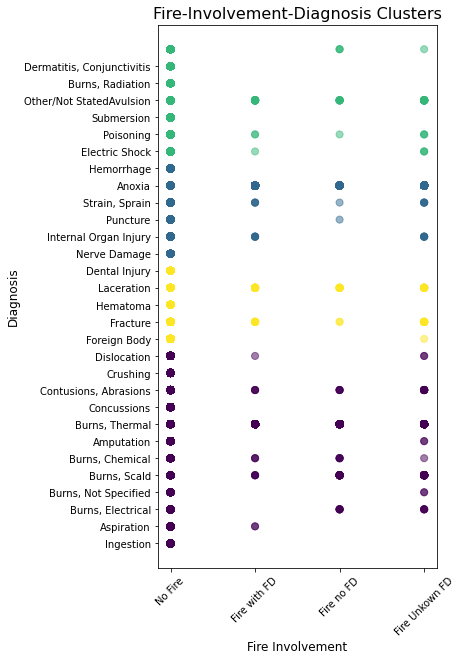

In [38]:
plt.figure(figsize=(5,10))
plt.title('Fire-Involvement-Diagnosis Clusters', fontsize=16)
plt.xlabel('Fire Involvement', fontsize=12)
plt.ylabel('Diagnosis', fontsize=12)
plt.scatter(my_data['fire involvement'], my_data['diagnosis'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)

diagnosis = ['Ingestion', 'Aspiration', 'Burns, Electrical', 'Burns, Not Specified', 'Burns, Scald', 'Burns, Chemical', 
    'Amputation', 'Burns, Thermal', 'Concussions', 'Contusions, Abrasions', 'Crushing', 'Dislocation', 'Foreign Body',
    'Fracture', 'Hematoma', 'Laceration', 'Dental Injury', 'Nerve Damage', 'Internal Organ Injury', 'Puncture',
    'Strain, Sprain', 'Anoxia', 'Hemorrhage', 'Electric Shock', 'Poisoning', 'Submersion', 'Other/Not Stated'
    'Avulsion', 'Burns, Radiation', 'Dermatitis, Conjunctivitis']
y1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
fire_involvement = ['No Fire', 'Fire with FD', 'Fire no FD', 'Fire Unkown FD']
x1 = [0, 1, 2, 3]
plt.xticks(x1, fire_involvement, rotation=45)
plt.yticks(y1, diagnosis, rotation=0)

plt.savefig('../../outputs/fire-diagnosis-clusters.png')